# Proyek Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Louis Widi 
- Email: louizzzwidi@gmail.com
- Id Dicoding: louis_widi

## Business Understanding

Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. 

### Permasalahan Bisnis

Walaupun telah menjadi menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

Untuk mencegah hal ini semakin parah, proyek ini berguna untuk mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate tersebut. Selain itu, terdapat <i>business dashboard</i> guna melakukan monitor pada faktor-faktor tersebut. 

### Cakupan Proyek

1. Identifikasi faktor penyebab <i>attrition</i>. Departemen HR akan mendapatkan informasi mengenai faktor-faktor yang mempengaruhi <i>attrition</i> dan akan mendapatkan rekomendasi terkait langkah-langkah yang sebaiknya dilakukan
2. Menyediakan model yang dapat memprediksi apakah seorang pegawai akan meninggalkan perusahaan atau tidak (<i>Attrition</i>). Model akan menjadi model klasifikasi yang dapat menerima data baru terkait pegawai.
3. Mengevaluasi model yang dibuat melalui pemisahan data <i>train</i> dan <i>test</i>
4. Menyediakan <i>business dashboard</i> yang akan diisi oleh data-data yang merupakan faktor penting terkait <i>Attrition</i>.

## 1. Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Pemrosesan data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Machine Learning Pre-Processing
import sklearn, imblearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.decomposition import PCA

# Classification dan Model Selection
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import GridSearchCV

# Evaluasi
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## 2. Data Understanding

- EmployeeId - ID pengenal pegawai
- Attrition - Apakah terjadi attrition pada pegawai? (0=tidak, 1=ya)
- Age - Umur pegawai
- BusinessTravel - Komitmen <i>travel</i> untuk pekerjaan
- DailyRate - Gaji harian
- Department - Departemen pegawai
- DistanceFromHome - Jarak tempat tinggal dengan kantor
- Education - 1-Di bawah perguruan tinggi, 2-Perguruan tinggi, 3-Sarjana, 4-Master,5-Doktor
- EducationField - Bidang pendidikan
- EnvironmentSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- Gender - Jenis kelamin pegawai
- HourlyRate - Tarif gaji per jam
- JobInvolvement - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- JobLevel - Tingkat pekerjaan (1 sampai 5)
- JobRole - Peran Pekerjaan
- JobSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- MaritalStatus - Status pernikahan
- MonthlyIncome - Penghasilan bulanan karyawan
- MonthlyRate - Gaji bulanan karyawan
- NumCompaniesWorked - Jumlah tempat bekerja sebelumnya
- Over18 - Sudah lebih dari 18 tahun?
- OverTime - Lembur?
- PercentSalaryHike - Kenaikan gaji dibanding tahun lalu
- PerformanceRating - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Spektakuler
- RelationshipSatisfaction - 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi
- StandardHours - Jam kerja standar
- StockOptionLevel - Kepemilikan saham atas perusahaan
- TotalWorkingYears - Jumlah tahun telah bekerja
- TrainingTimesLastYear - Jumlah pelatihan yang dijalani tahun lalu
- WorkLifeBalance - 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Spektakuler
- YearsAtCompany - Jumlah tahun di perusahaan
- YearsInCurrentRole - Jumlah tahun di peran saat ini
- YearsSinceLastPromotion - Jumlah tahun setelah promosi terakhir
- YearsWithCurrManager - Jumlah tahun dengan manager saat ini


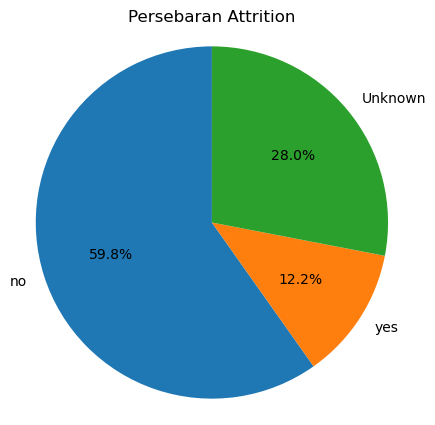

In [3]:
unique, counts = np.unique(df['Attrition'], return_counts = True)
labels = ['no', 'yes', 'Unknown']

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts,  labels = labels, autopct='%1.1f%%', startangle=90)
plt.title('Persebaran Attrition')
plt.axis('equal')  # Aspect ratio equal
plt.show()

Berkaitan dengan tujuan analsisi ini, <i>attrition</i> akan menjadi pusat perhatian analisis. Pada data ini, terdapat 28.0% pekerja yang belum diketahui akan melakukan attrition atau tidak.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Pada analisis informasi mengenai data yang digunakan, tidak terdapat nilai yang hilang (<i>missing values</i>) pada informasi lain mengenai pegawai.

In [5]:
df_predict = df[df['Attrition'].isna()]
df_predict.to_csv('df_predict.csv', index = False)
df_predict.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,1,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,1,...,3,80,2,7,6,3,7,7,0,7


In [6]:
df_main = df.dropna()
df_main.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


Data yang memiliki nilai yang kosong untuk <i><Attrition</i> sudah dipisahkan menjadi df_predict yang akan kita gunakan untuk proses prediksi dan df_main yang akan kita gunakan untuk proses analisis.

In [7]:
# Memisahkan data numerik dan kategorik
numeric_data = df_main.select_dtypes(include=[np.number])
categorical_data = df_main.select_dtypes(exclude=[np.number])
categorical_data['Attrition'] = df_main['Attrition']

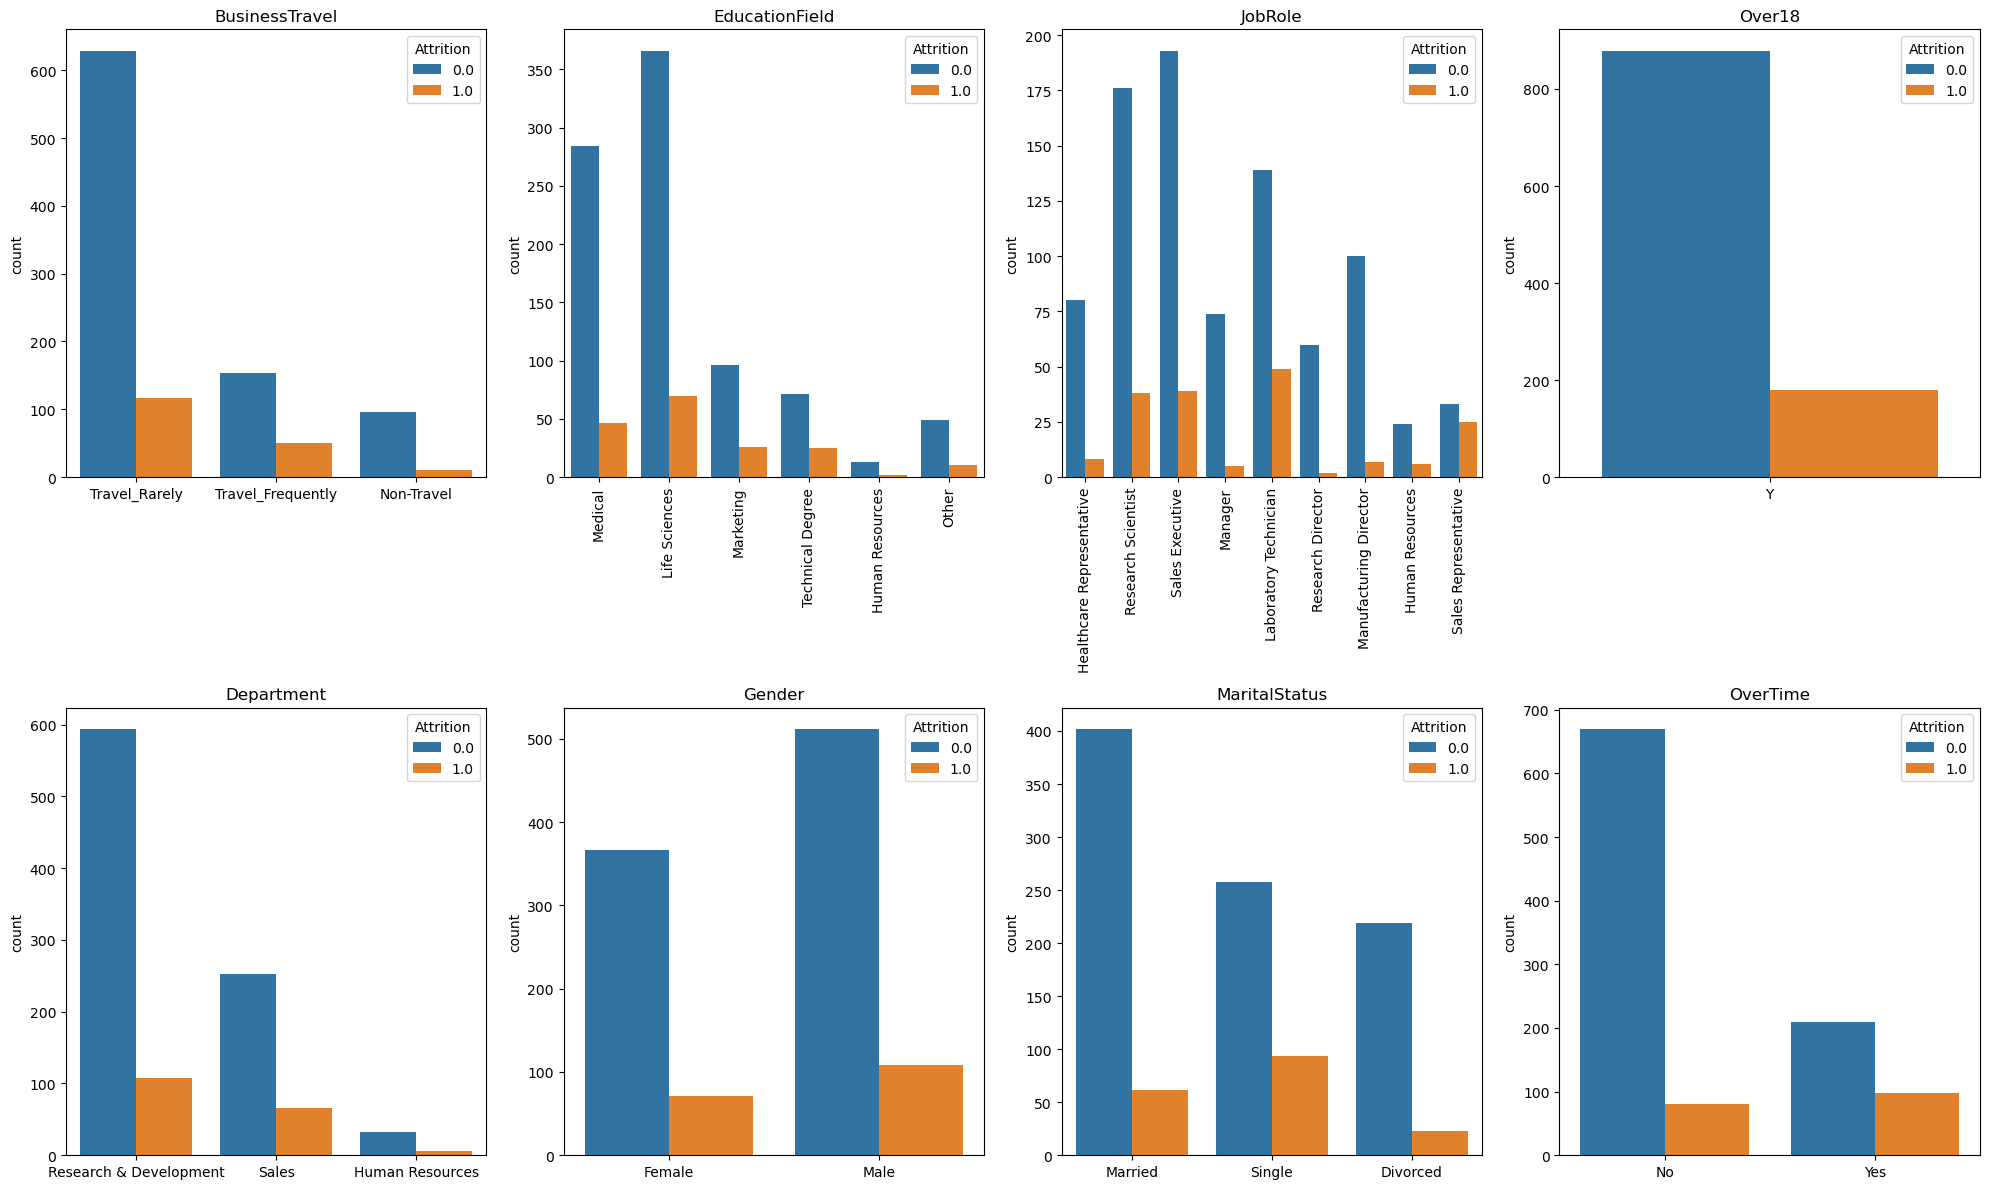

In [8]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (20,12))
i = 0
for k in range(4):
    for j in range(2):
        sns.countplot(categorical_data, x = categorical_data.columns[i], ax = ax[j][k], hue = 'Attrition')
        if i == 2 or i == 4: 
            ax[j][k].tick_params(axis='x', rotation=90)
        ax[j][k].set_xlabel('')
        ax[j][k].set_title(categorical_data.columns[i])
        
        i += 1
fig.tight_layout()
plt.show()

- Laboratory technician, sales representative, sales executive, dan research scientist merupakan job role yang paling sering terjadi attrition. Sales Representative merupakan <i>role</i> pekerjaan dengan persentase pegawai yang meninggalkan perusahaan paling besar.
- Terjadi <i>attrition</i> lebih banyak terhadap karyawan yang masih single dalam hal status relationship mereka.
- Lembur juga menjadi faktor yang menyebabkan <i>attrition</i> terjadi dengan proporsi pegawai yang meninggalkan perusahaan lebih besar terjadi pada pegawai yang terlibat lembur dibandingkan yang tidak.
- Semua pegawai telah melebihi umur 18 dengan kolom Over18 hanya memiliki 1 nilai ('Y')

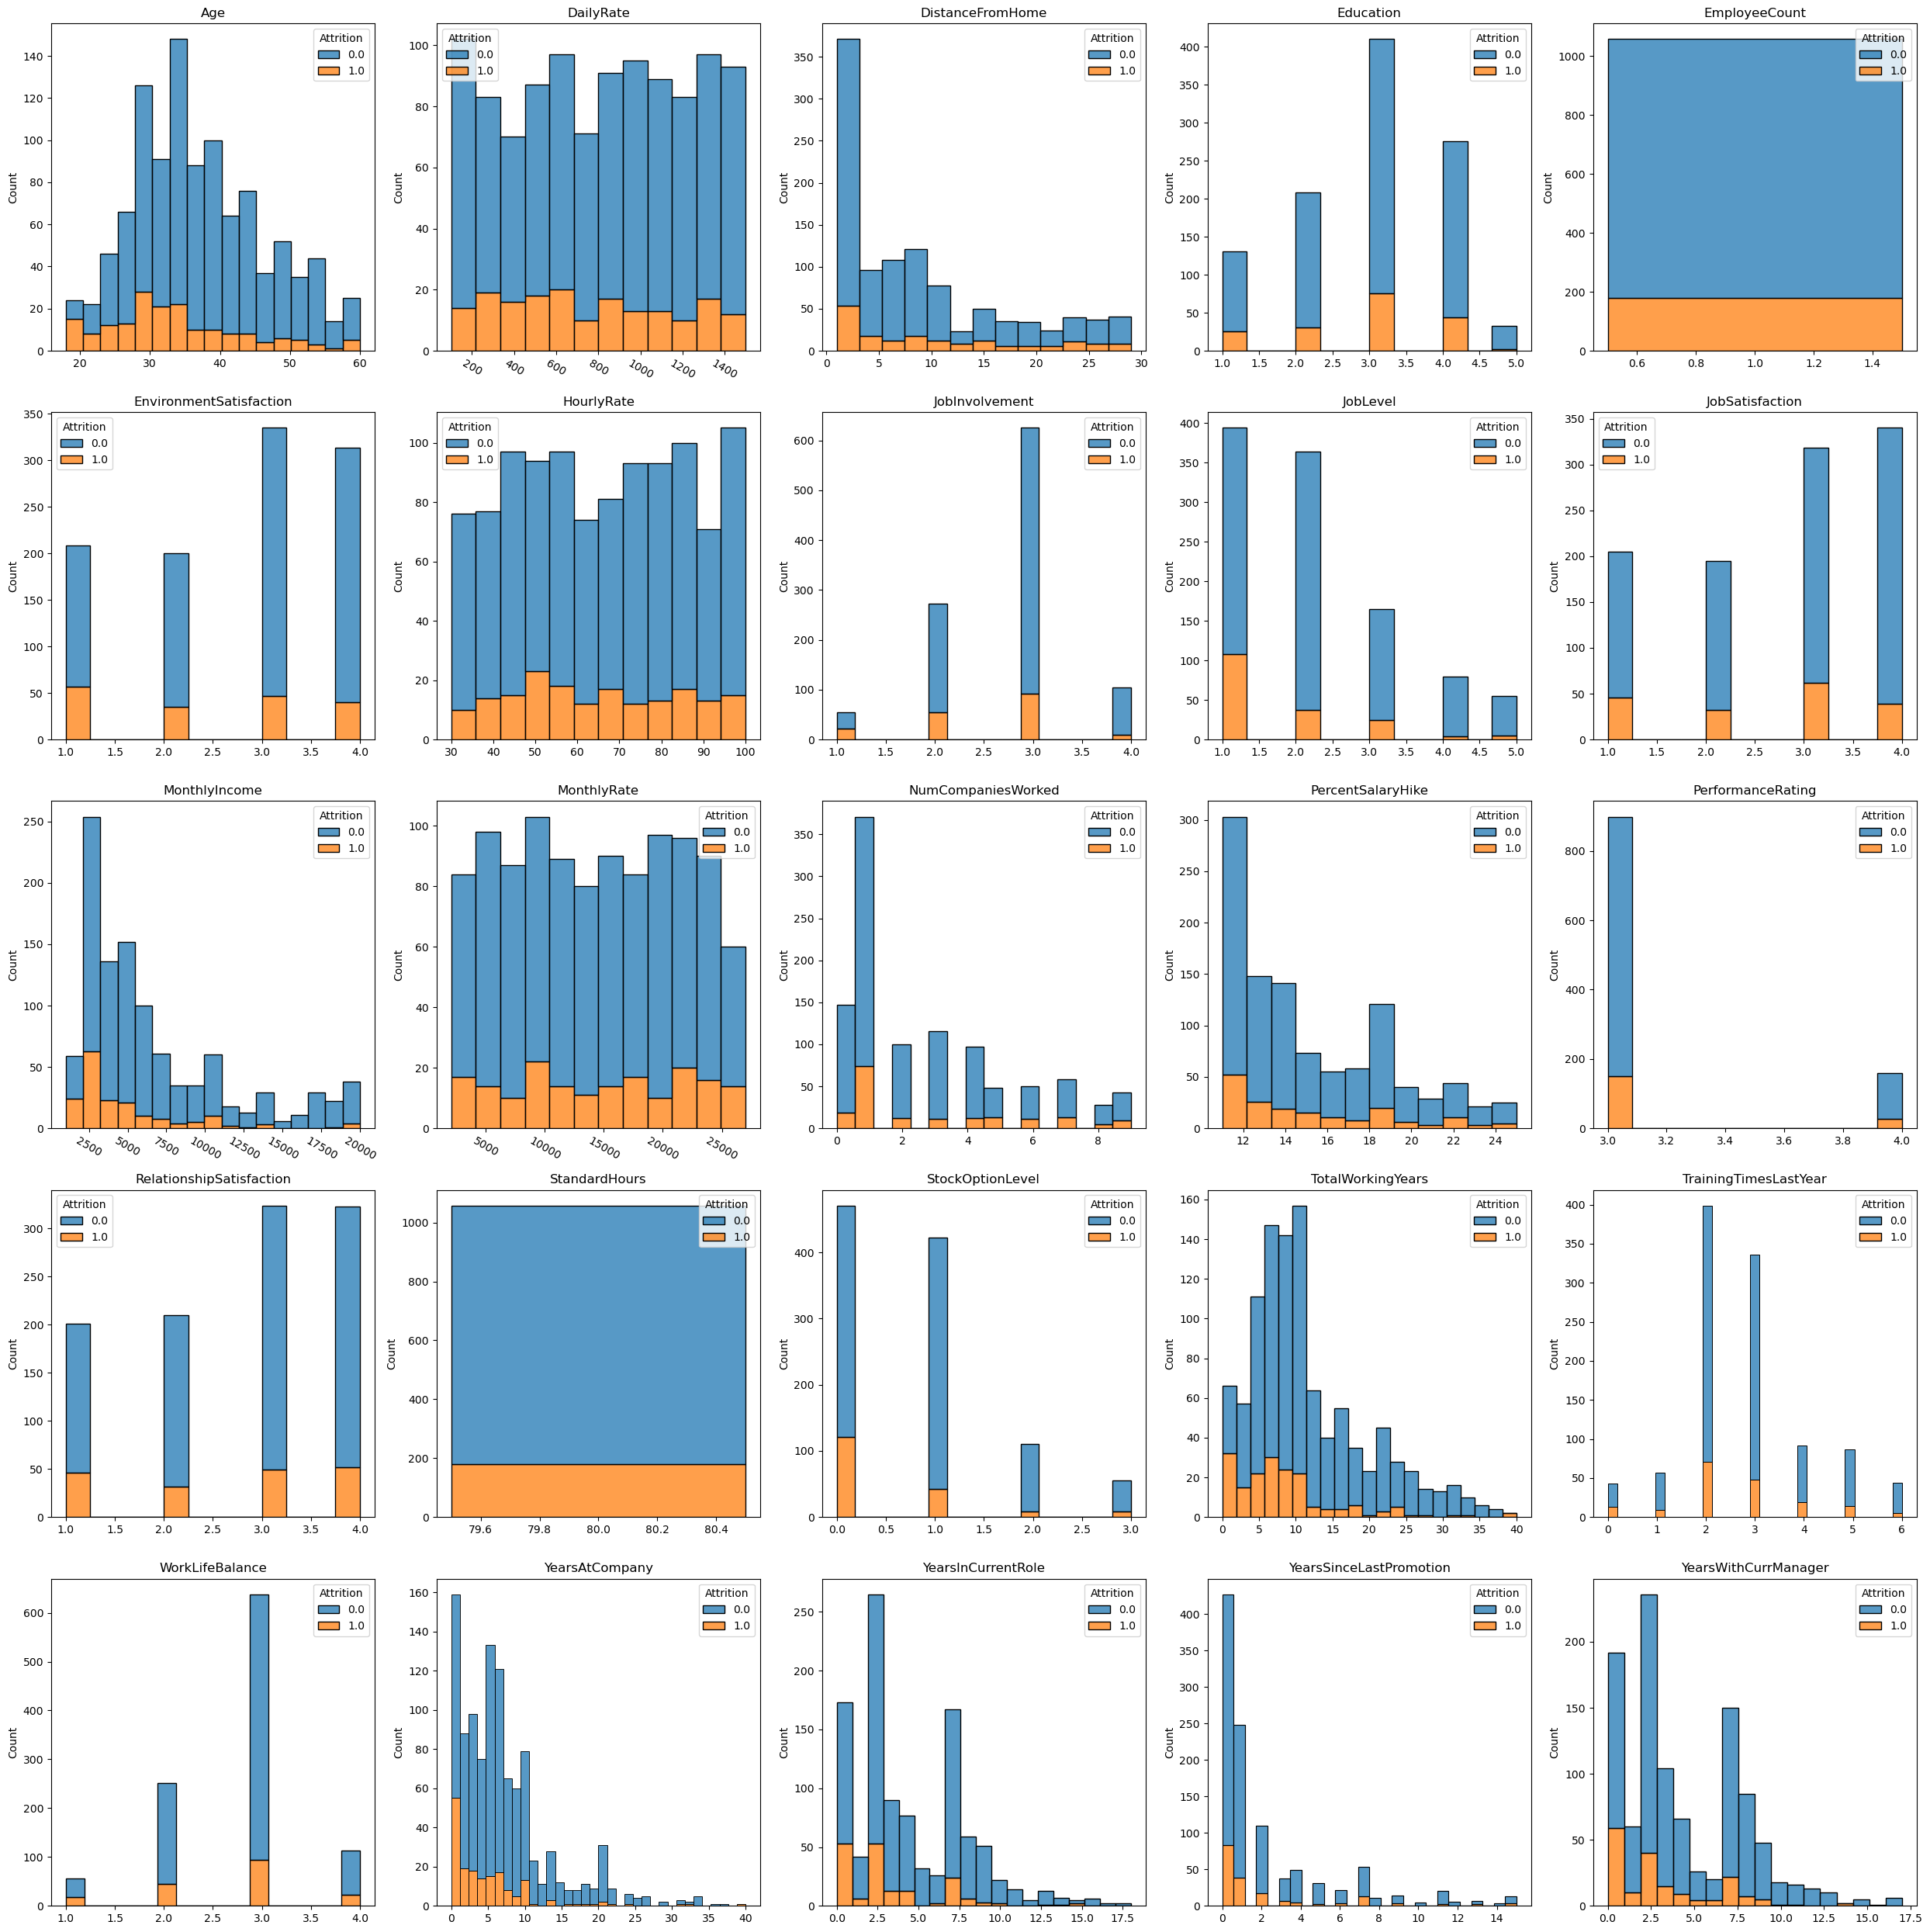

In [9]:
fig, ax = plt.subplots(ncols = 5, nrows = 5, figsize = (25,25))
columns = list(numeric_data.columns)
columns.remove("Attrition")
columns.remove("EmployeeId")
i = 0
for j in range(5):
    for k in range(5):
        sns.histplot(numeric_data, x = columns[i], ax = ax[j][k], hue = 'Attrition', multiple = "stack")
        if (i == 1 or i == 10) or i == 11: 
            ax[j][k].tick_params(axis='x', rotation=-30)
        ax[j][k].set_xlabel('')
        ax[j][k].set_title(columns[i])
        
        i += 1
fig.tight_layout()
plt.show()

- Jumlah karyawan attrition yang jarak tempat tinggal dengan tempat kerja dekat lebih banyak dibandingkan yang jauh
- Karyawan yang baru masuk perusahaan cenderung lebih sering didapati attrition (YearsAtCompany) dan sebagian besar yang baru masuk perusahaan sebagai pekerjaan pertama atau kedua mereka (TotalWorkingYears dan NumCompaniesWorked) paling sering didapati attrition dibandingkan mereka yang telah bekerja selama lebih dari 5 tahun.
- Keterlibatan terhadap pekerjaan yang dideskripsikan oleh <i>JobInvolvement</i> juga menunjukkan, sedikitnya keterlibatan terhadap pekerjaan dapat menjadi penyebab karyawan meinggalkan perusahaan (<i>attrition</i>)
- <i>StandardHours</i> dan <i>EmployeeCount</i> juga hanya memiliki 1 nilai, yakni '80 jam' dan '1'
<br>
<br>
### Penemuan Awal:
Secara umum, pada tahap ini, melalui analisis terhadap data kategorik dan numerik, pekerja yang meninggalkan perusahaan adalah pekerja yang baru masuk, memiliki keterlibatan rendah, tetapi diminta untuk melakukan lembur, terutama pada departemen pemasaran (<i>Sales</i>) dan riset (<i>Research</i>).

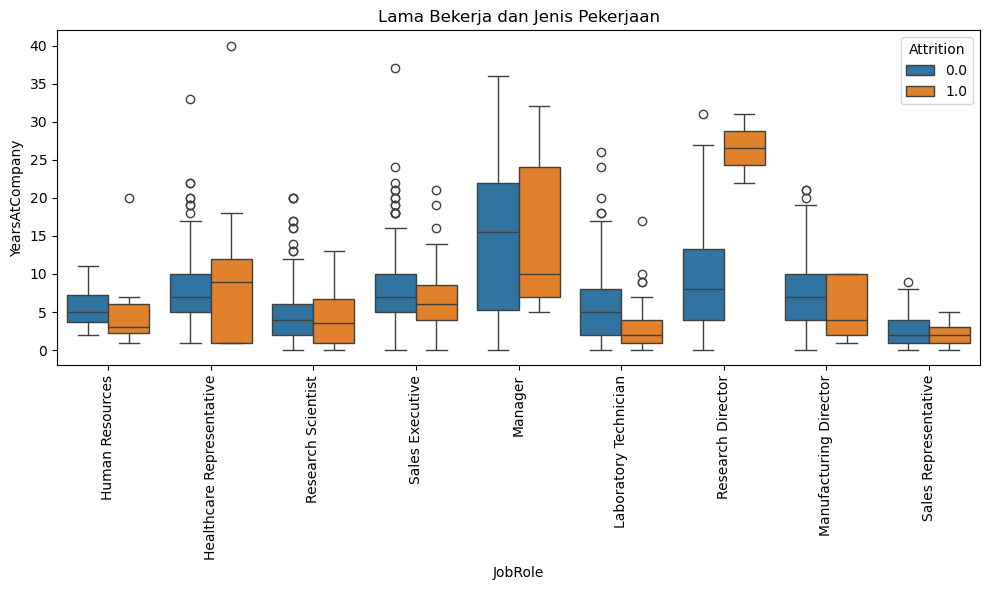

In [10]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(df, x = 'JobRole', y = 'YearsAtCompany', hue = 'Attrition')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Lama Bekerja dan Jenis Pekerjaan")
plt.tight_layout()
plt.show()

Secara umum, korelasi jenis pekerjaan dan jumlah tahun seorang pegawai telah bekerja pada perusahaan tersebut menunjukkan bahwa rata-rata untuk posisi <i>entry level</i> memiliki tingkat attrition yang lebih terfokus pada pekerja yang baru masuk perusahaan. Pengecualian terjadi untuk posisi <i>Research Director</i> yang menunjukkan bahwa pegawai yang meninggalkan perusahaan terfokus pada mereka yang telah bekerja lama di perusahaan (lebih dari 20 tahun), hal ini mengindikasikan bahwa pegawai tersebut meninggalkan perusahaan karena pensiun.

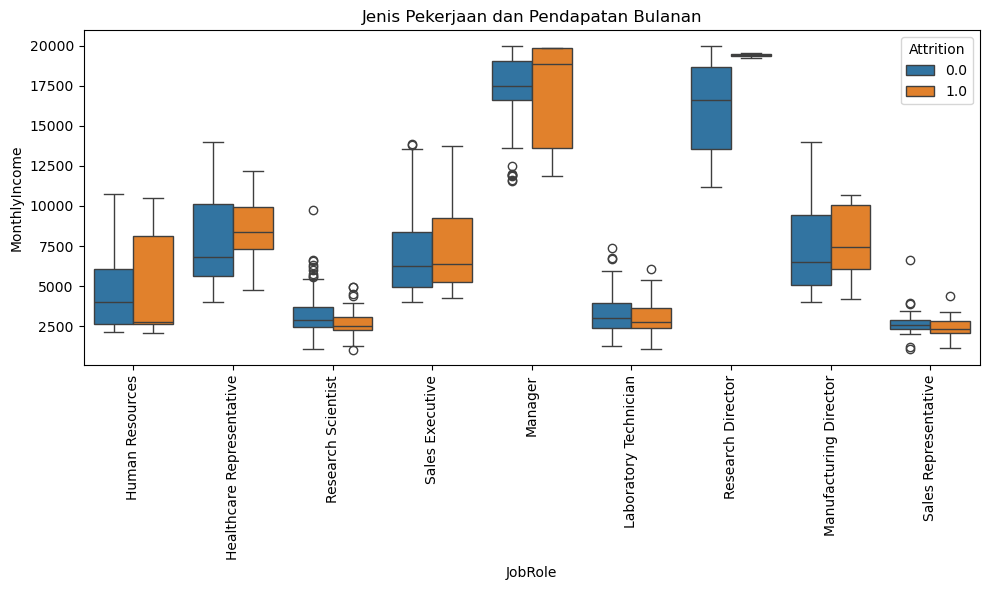

In [11]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(df, x = 'JobRole', y = 'MonthlyIncome', hue = 'Attrition')
ax.tick_params(axis='x', rotation=90)
ax.set_title("Jenis Pekerjaan dan Pendapatan Bulanan")
plt.tight_layout()
plt.show()

Melihat distribusi pendapatan bulanan dan jenis pekerjaan, terdapat disparitas pendapatan yang sangat tinggi terhadap beberapa jenis pekerjaan. <i>Research Scientist, Laboratory Technician, & Sales Representative</i> memiliki persebaran yang sangat terfokus di angka rendah dibandingkan jenis pekerjaan lainnya, terutama menejer dan direktur riset.

## 3. Data Preparation / Preprocessing

In [12]:
# Pre-processing function
def preprocess(df):
    # dropping features with only one value and primary key
    df = df.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeId'], axis = 1)

    # mapping categorical and ordinal features.
    mapOvertime = {'No' : 0, 'Yes' : 1}
    df = df.replace({'OverTime' : mapOvertime})

    mapTravel = {'Non-Travel' : 1, 'Travel_Rarely' : 2, 'Travel_Frequently':3}
    df = df.replace({'BusinessTravel' : mapTravel})

    mapGender = {'Female' : 0, 'Male' : 1}
    df = df.replace({'Gender' : mapGender})

    # encoding other categorical columns
    categorical_column = ['Department', 'JobRole', 'MaritalStatus','EducationField']
    encoder=LabelEncoder()
    df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)
    
    return df

def preprocess_predict(df):
    df = preprocess(df)
    df = df.drop(['Attrition'], axis = 1)
    return df

### Pre-processing dan Mencari Korelasi antar Fitur

/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_13211/3374058395.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'OverTime' : mapOvertime})
/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_13211/3374058395.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'BusinessTravel' : mapTravel})
/var/folders/kp/1yj5j5nx6gddj5pqbjbnl45r0000gn/T/ipykernel_13211/3374058395.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

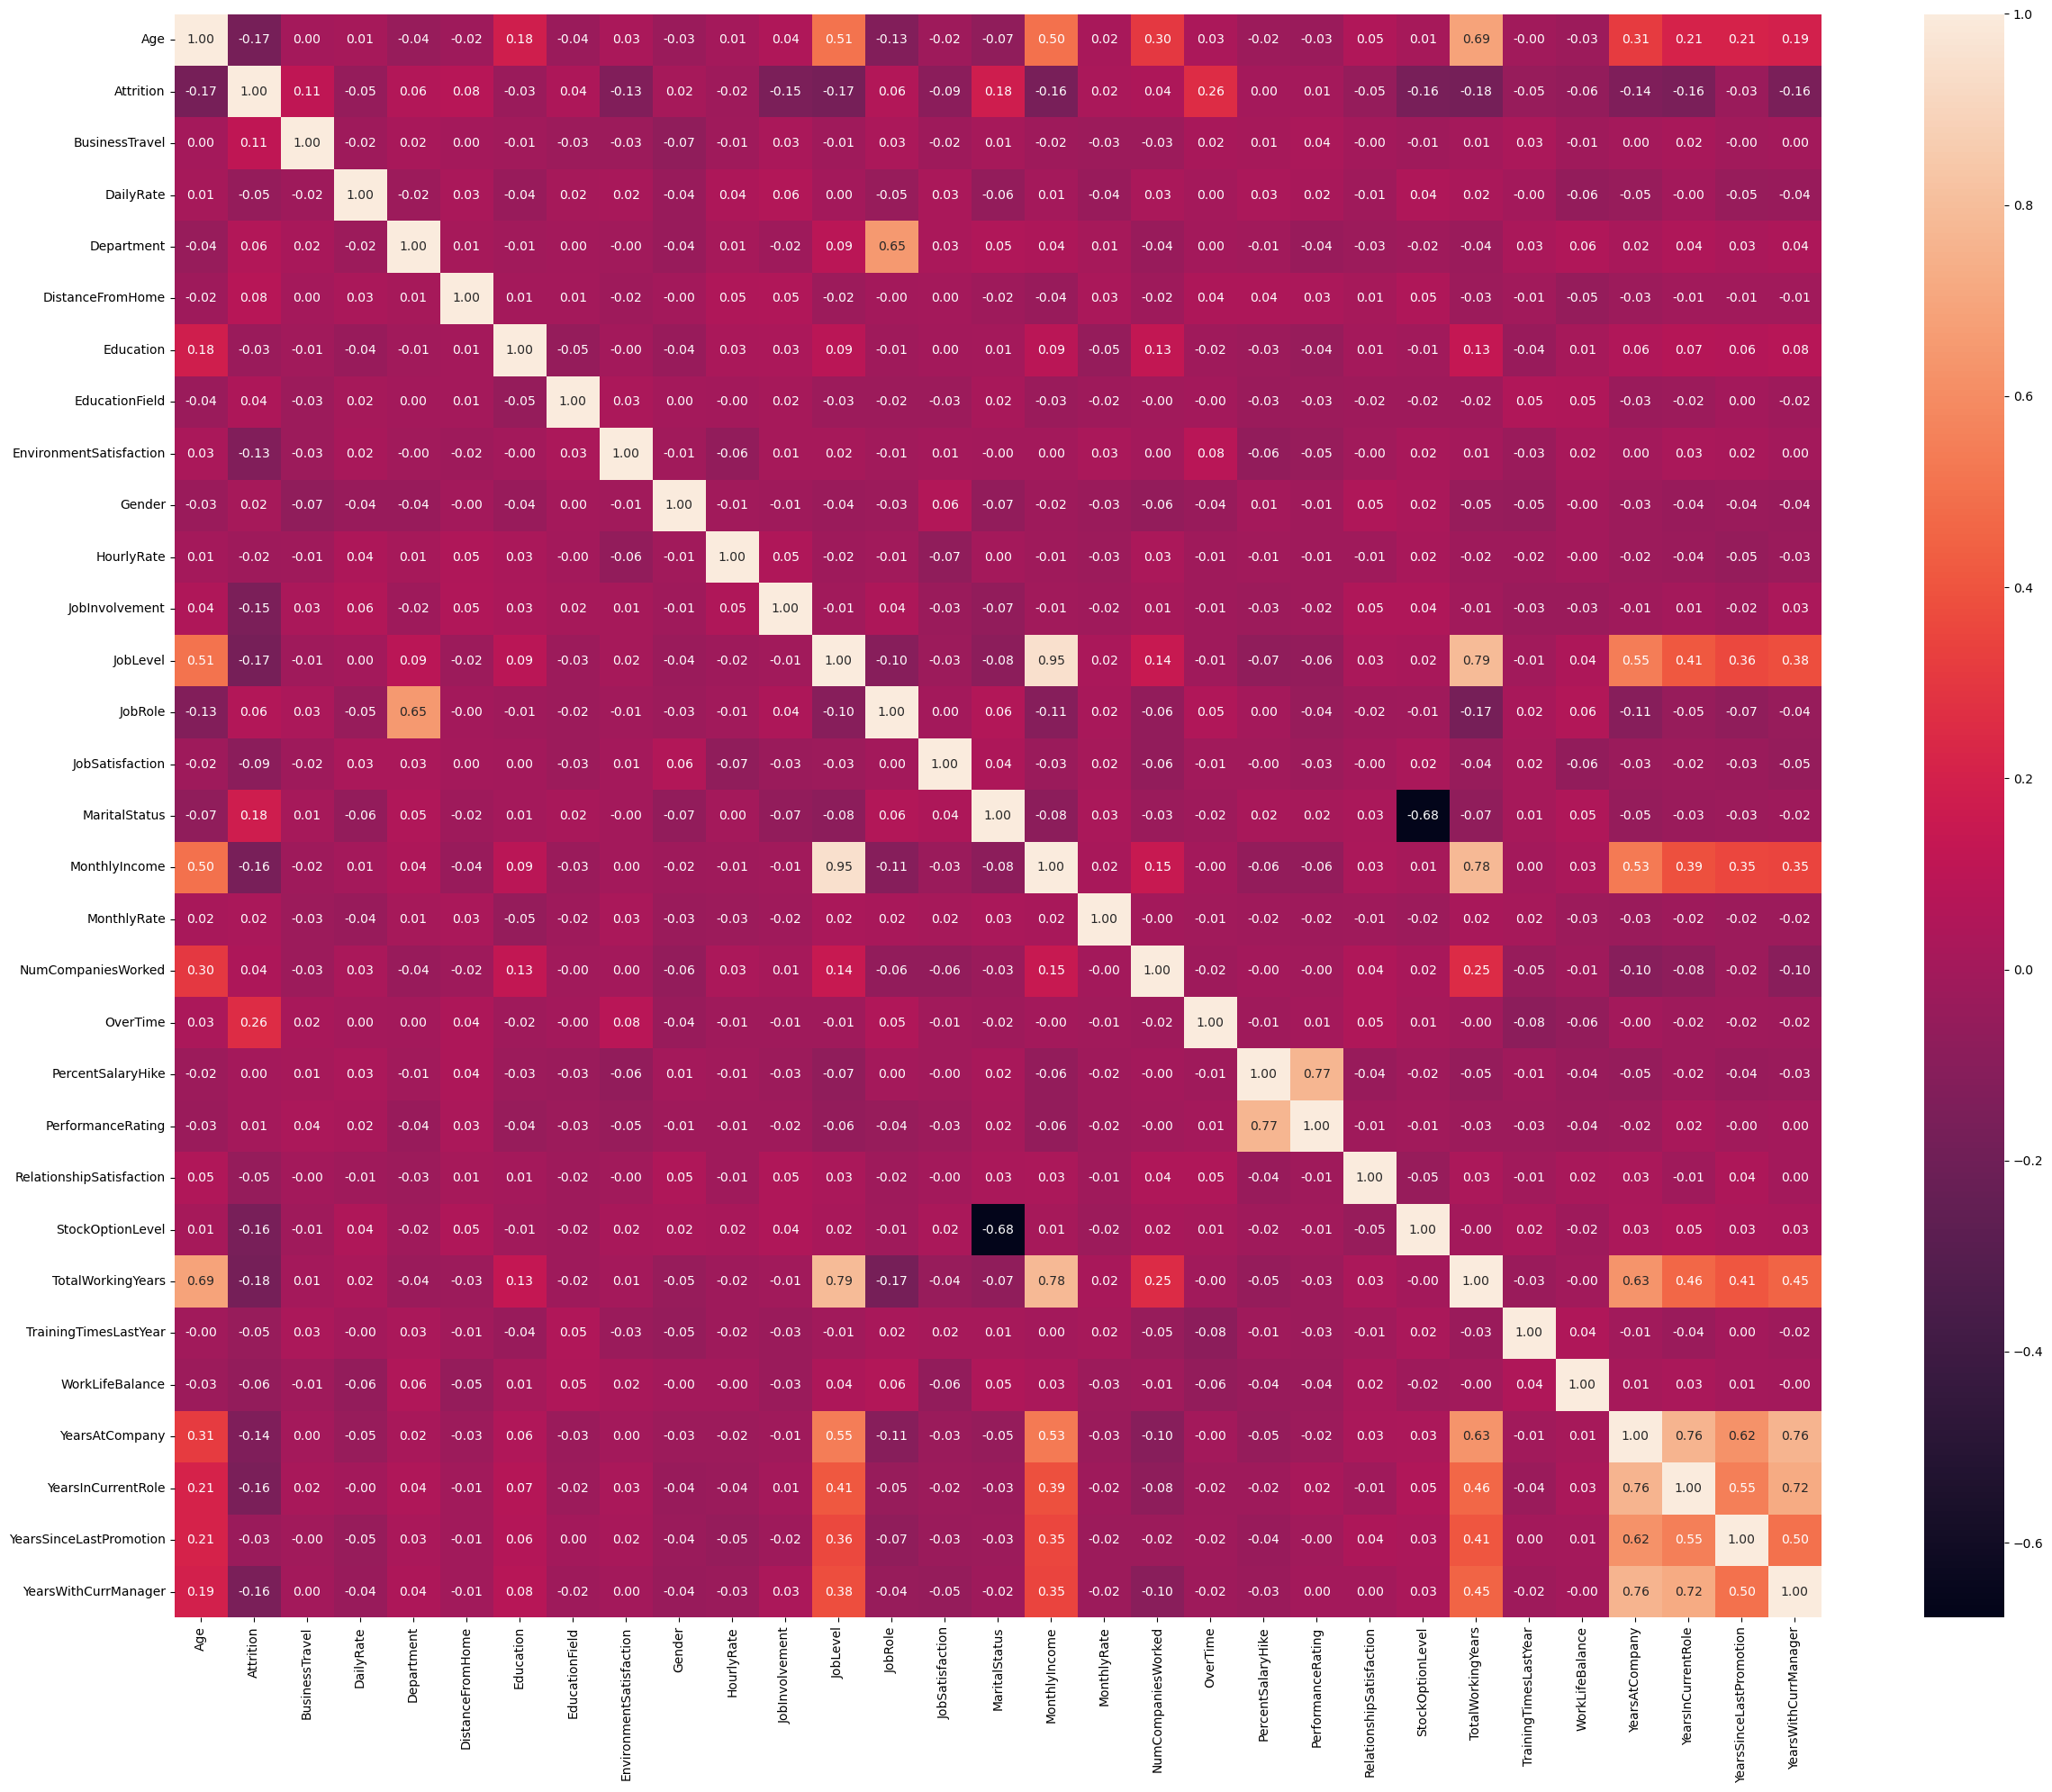

In [13]:
df_main_encoded = preprocess(df_main)

# Mencari korelasi antara data
corr = df_main_encoded.corr()
# Visualisasi korelasi
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.tight_layout()
plt.savefig('corr.png');

### Data Splitting dan Preparation (Oversampling & PCA)

In [14]:
y = df_main_encoded['Attrition']
X = df_main_encoded.drop(['Attrition'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Oversampling dengan SMOTEN

In [15]:
# Oversampling
sm = SMOTEN(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

#### Feature Selection dengan PCA

[ 75.29041996  99.77484201  99.9991962   99.9997224   99.99980844
  99.99987664  99.99992496  99.99994134  99.99995622  99.99996456
  99.99997134  99.99997711  99.99998208  99.99998579  99.9999879
  99.99998987  99.99999161  99.99999333  99.99999494  99.99999606
  99.99999714  99.99999776  99.99999836  99.99999872  99.99999903
  99.9999993   99.99999957  99.99999978  99.99999994 100.        ] % varians secara kumulatif


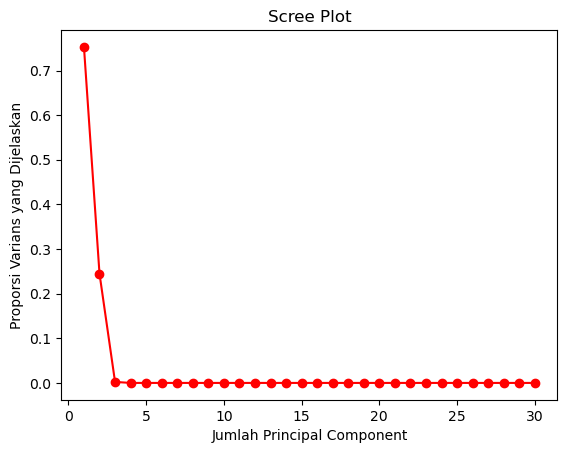

In [16]:
pca = PCA(random_state=42)
principalComponents = pca.fit_transform(X_train_res)

print( np.cumsum(pca.explained_variance_ratio_)*100, '% varians secara kumulatif')


PC = np.arange(pca.n_components_) + 1
plt.plot(PC, pca.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Jumlah Principal Component')
plt.ylabel('Proporsi Varians yang Dijelaskan')
plt.show()

Melalui hasil analisis pada <i>Scree Plot</i>, PCA menunjukkan akan optimal dengan menggunakan 2 fitur.

[75.29041996 99.77484201] % varians secara kumulatif


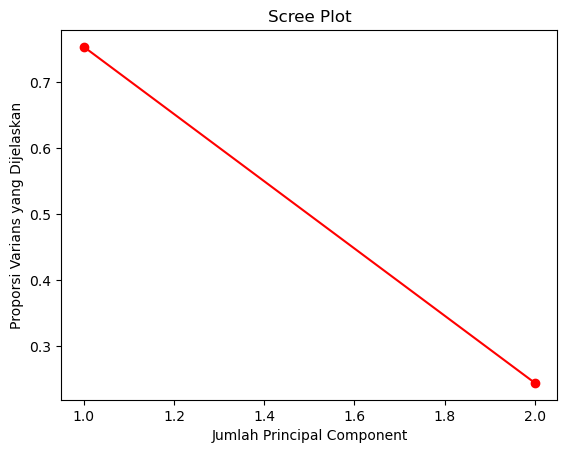

In [17]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X_train_res)

print( np.cumsum(pca.explained_variance_ratio_)*100, '% varians secara kumulatif')

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
plt.xlabel('Jumlah Principal Component')
plt.ylabel('Proporsi Varians yang Dijelaskan')
plt.show()

In [18]:
# Mengaplikasikan PCA
X_train_res = principalComponents
X_test = pca.transform(X_test)

## 4. Modeling

### Modeling dengan K-Nearest Neighbors(K-NN) dan Model Selection dengan Grid Search

In [19]:
# K-NN
# Metrik pengukuran jarak akan menggunakna minkowski karena fleksibilitasnya
KNN = KNeighborsClassifier( metric = 'minkowski' )

# Parameters 
n_neighbors = [3, 5, 7, 9, 11, 13, 15]
p = [1,2]

# Persiapan GridSearch
Grid = {'n_neighbors' : n_neighbors,
       'p' : p}
KNN_CV = GridSearchCV(estimator = KNN, param_grid = Grid)

In [20]:
KNN_CV.fit(X_train_res,y_train_res)
y_pred = KNN_CV.predict(X_test)

print("Best Accuracy: ",KNN_CV.best_score_)
print("Best Params: \n", KNN_CV.best_params_)

Best Accuracy:  0.8479982976308695
Best Params: 
 {'n_neighbors': 3, 'p': 2}


## 5. Evaluation

Accuracy:  0.7358490566037735
Precision:  0.25
Recall:  0.2
F1-Measure:  0.2222222222222222


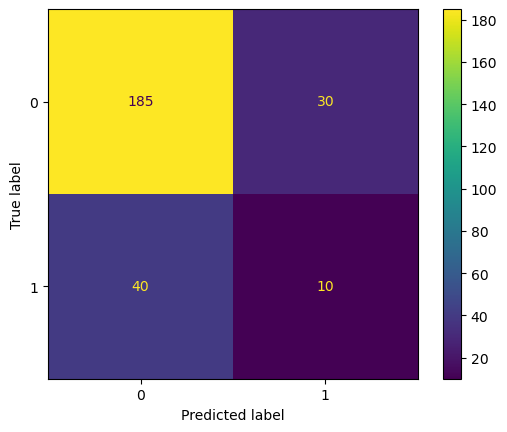

In [21]:
y_pred = KNN_CV.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1-Measure: ", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## 6. Conclusion

1. Tenure. Pekerja yang sudah lama di perusahaan (kecuali pensiun) cenderung tidak akan meninggalkan pekerjaan. Hal ini juga berkaitan dengan faktor selanjutnya.
2. Demografi. Pekerja yang berumur muda akan cenderung meninggalkan perusahaan dan berkaitan erat dengan mereka yang belum menikah. Hal ini menjadi dugaan bahwa pekerja yang meninggalkan perusahaan adalah mereka yang tidak memiliki tanggungan besar.
3. Jenis Pekerjaan dan Pendapatan. Pekerja dengan <i>entry level role</i> cenderung memiliki nilai pendapatan yang lebih rendah. Jenis pekerjaan seperti <i>sales</i> dan <i>laboratory technician</i> akan memiliki pendapatan yang lebih rendah dibandingkan peran lain yang menjadi salah satu faktor <i>attrition</i>.
4. Keterlibatan Pekerjaan. Pekerja yang memiliki keterlibatan rendah lebih mungkin untuk meninggalkan perusahaan, terutama mereka yang terlibat dalam lembur.
   
### 7. Rekomendasi Action Items (Optional)

- Memastikan lingkungan yang kondusif bagi para pekerja, terutama ketika lembur. Hal ini menjadi catatan penting agar para pekerja yang lembur tidak merasa terbebani, terutama bagi mereka yang baru saja masuk perusahaan. Departemen HR juga dapat memberikan informasi tambahan di waktu yang akan datang karena pada saat ini hanya terdapat informasi mengenai apakah pegawai menjalankan lembur atau tidak. 
- Memberikan <i>coaching</i> yang lebih baik terhadap pekerja yang baru masuk, terutama mereka yang berumur muda agar memiliki <i>sense of belonging</i>. Hal ini akan berkaitan dengan kenyamanan untuk bekerja di perusahaan dan akan berkaitan dengan rekomendasi selanjutnya, yakni untuk mememberi apresiasi kepada para pegawai. Tentu, sistem ini harus dijalankan mulai dari tingkat pekerja <i>entry level</i> hingga tingkat paling atas.
- Membuat sistem bonus yang membuat para pekerja merasa dihargai, serta memberikan sistem dimana semua pekerja dapat memiliki keterlibatan yang sama. Hal ini berkaitan dengan fakta bahwa pekerja yang memiliki sedikit keterlibatan dalam pekerjaan mereka cenderung akan meninggalkan perusahaan, persuahaan dapat membuat sistem bonus yang memberikan apresiasi yang baik bagi para pegawai dan membuat sistem dimana keterlibatan akan teredistribusi secara merata.

## 8. Export Modeling

In [22]:
import pickle as pk
pk.dump(pca, open("pca.pkl", "wb"))
pk.dump(KNN_CV, open("KNN_CV.pkl", "wb"))